# Noteboook for SRB times analysis
Goals:
- removal of short interruptions between two events
- removal of too short events afterwards (it has to last at least given amount of time in order not to be just an accidental movment synchro)
- plotting the distribution of time differences in between all of those events before and after times analysis
- SRB head retractoins in given <t0, t1> detection

Approach:
- start by detecting SRB with new bounds 
- dtime in between detected events
- distplot
- limitations
- distplot

*work on: single sample -> handpicked srb -> more general approach

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')

dfratclean = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

In [2]:
df = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df['subU'] = df['speed'] - df['U'] 
df['subUM'] = df['speed'] - df['UM'] 

In [3]:
dfSRB2 = pd.DataFrame()
dd2 = df[df['session_id']==2]

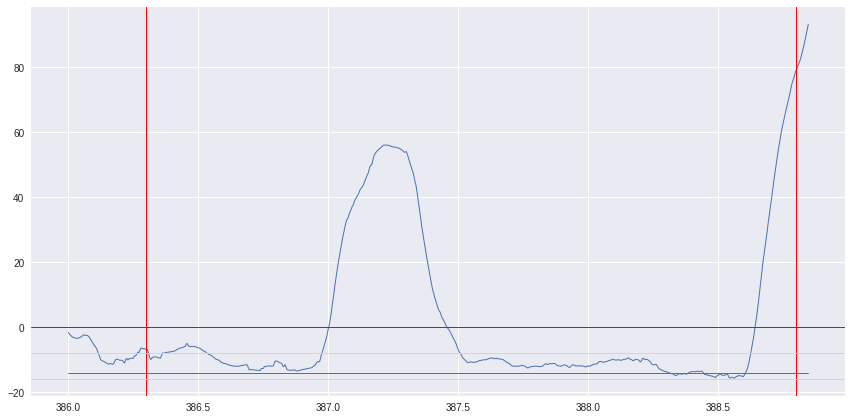

In [4]:
## 386, 388
dpart2 = dd2[(dd2['Time']>386) & (dd2['Time']<388.85)]
xmin, xmax = 386.3, 388.8
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

g = sns.FacetGrid(data=dpart2, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');


In [5]:
# dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
# # dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

# ## 402, 407
# dpart = dd2[(dd2['Time']>402) & (dd2['Time']<409.1)]
# xmin, xmax = 402.1, 409

# g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,80])
# g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# # g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
# g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
# g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
# g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

## Applying an new SRB range values

In [6]:
dfV = dpart2.copy()
limmax = -16
limmin = -6
dfV['SRB'] = (dfV['U'] < limmin) & (dfV['U'] > limmax)

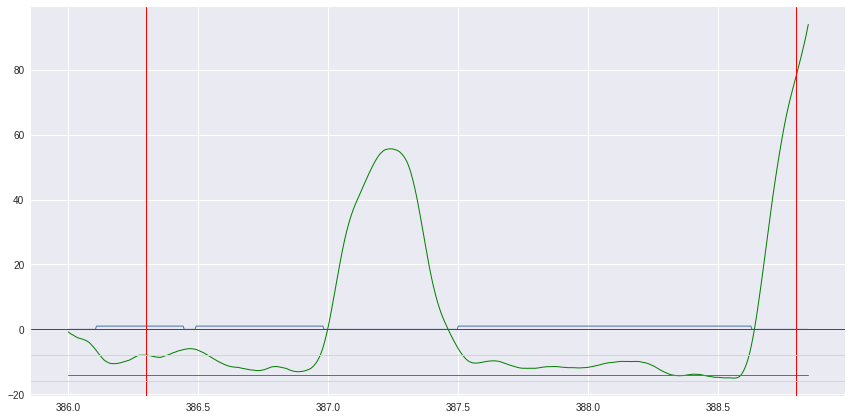

In [7]:
g = sns.FacetGrid(data=dfV, size=6, aspect=2)
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", 'SRB' , alpha=1, linewidth=1);

g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');


In [8]:
print(len(dfV[dfV['SRB']==True]))
print(len(dpart2))

470
684


In [9]:
# dfV['dtime'] = np.where(dfV[dfV['SRB']==True],  dfV['Time'].diff(1), 0) # TODO, rethink the approach

dfSRBtemp = dfV[dfV['SRB']==True]
dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
dfSRBtemp.drop(['X_Pos', 'Y_Pos', 'Z_Pos', 'X_Ori', 'Y_Ori', 'Z_Ori','dT'], axis=1, inplace=True)
dfSRBtemp.drop(['lVo', 'lx1', 'lz1', 'V1', 'lx2', 'lz2', 'clockwise', 'theta', 'U', 'UM', 'MotiveExpTimeSecs', 'visible', 'speed', 'subU', 'subUM', 'SRB'], axis=1, inplace=True)


/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df1 = pd.merge(dfV, dfSRBtemp, on=['Frame', 'session_id','Time'], how='outer')
df1
print(len(dfV))
print(len(df1))

684
684


In [12]:
df1.fillna(0, inplace=True)
times = df1.dtime[df1['dtime']>0.005]
times

118    0.050000
360    0.520834
Name: dtime, dtype: float64

In [13]:
# df1.fillna(0, inplace=True)
# df1.dtime = df1.dtime *10 
# df1[df1['dtime']>0.5]

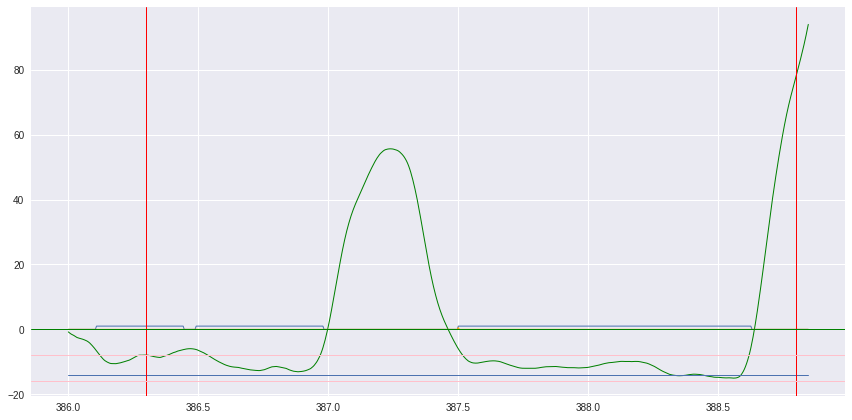

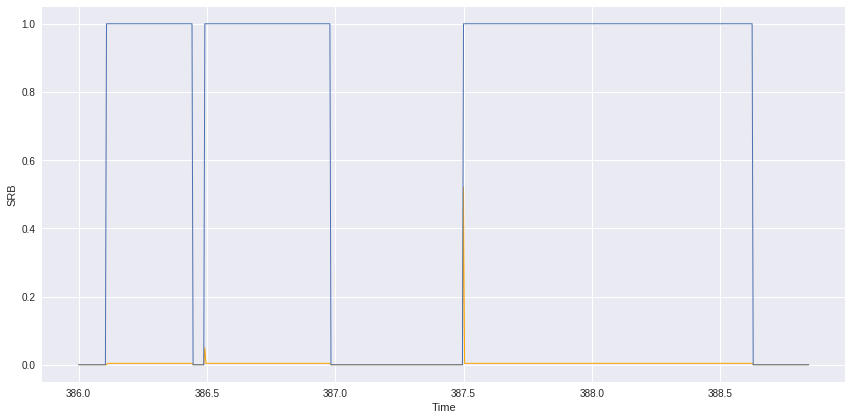

In [14]:
g = sns.FacetGrid(data=df1, size=6, aspect=2)
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", 'SRB' , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');

g = sns.FacetGrid(data=df1, size=6, aspect=2)
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1);

,Frame,Time,session_id,dtime
209969,92758,386.491691,2,0.05


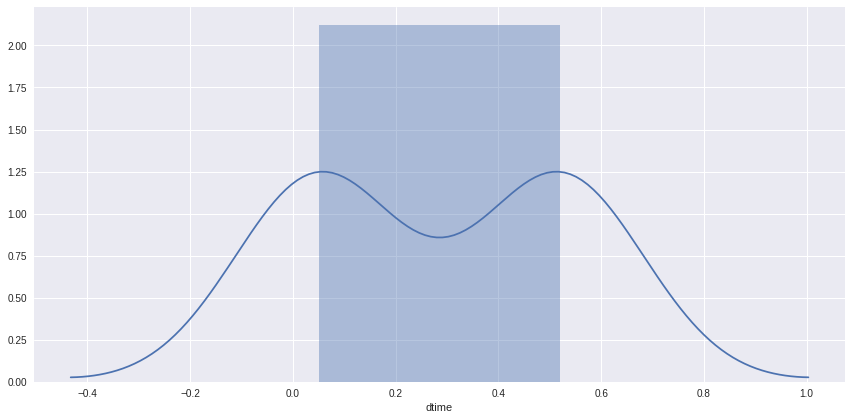

In [15]:
g = sns.FacetGrid(data=dfSRBtemp[dfSRBtemp['dtime']>0.005], size=6, aspect=2)
g.map(sns.distplot, "dtime" );

dfSRBtemp[(dfSRBtemp['dtime']>0.005) & (dfSRBtemp['dtime']<0.1)]

In [16]:
dftemp = dfSRBtemp[(dfSRBtemp['dtime']>0.005) & (dfSRBtemp['dtime']<0.1)]
dftemp = dftemp.reset_index(drop=True)

# maxF = dftemp.Frame[0]
# minF = df1[(df1['dtime']>0) & df1['Frame']<maxF].Frame[0]
maxF = dftemp.Time[0]
minF = df1[(df1['dtime']>0) & (df1['Time']<maxF)].Time
minF = minF.iloc[-1]
print(minF, maxF)

386.441691 386.491691


In [17]:
df1['SRBtt'] = np.where(((df1['Time']>minF) & (df1['Time']<maxF)) , True, False)
df1['SRBall'] = np.where((df1['SRBtt']==True) | (df1['SRB']==True), True, False)

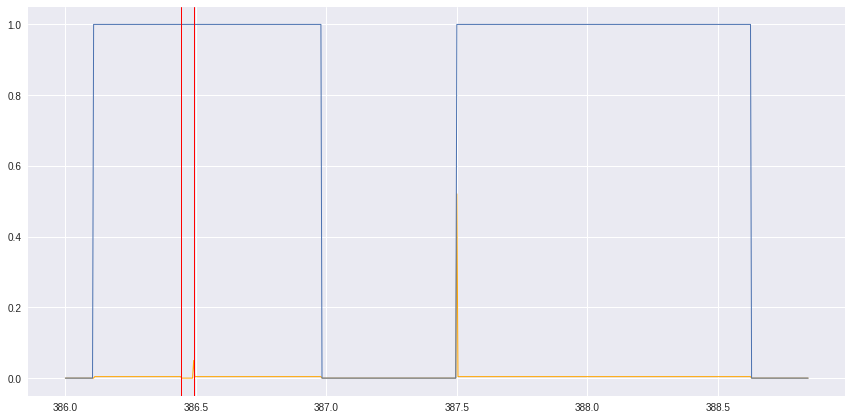

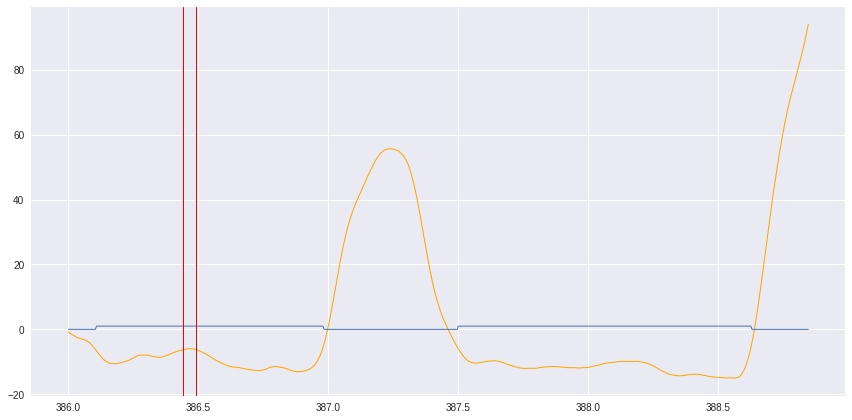

In [18]:
g = sns.FacetGrid(data=df1, size=6, aspect=2)
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1);
g.map(plt.axvline, x=minF, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=maxF, alpha=1, linewidth=1, color='red');

g = sns.FacetGrid(data=df1, size=6, aspect=2)
g.map(plt.plot, "Time", "UM" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1);
g.map(plt.axvline, x=minF, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=maxF, alpha=1, linewidth=1, color='red');


## Second episode

In [19]:
xmin, xmax = 402.1, 409

dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

dfV = dpart2.copy()
# dfV['SRB'] = (dfV['U'] < -8) & (dfV['U'] > -16)
dfV['SRB'] = (dfV['U'] < limmin) & (dfV['U'] > limmax)


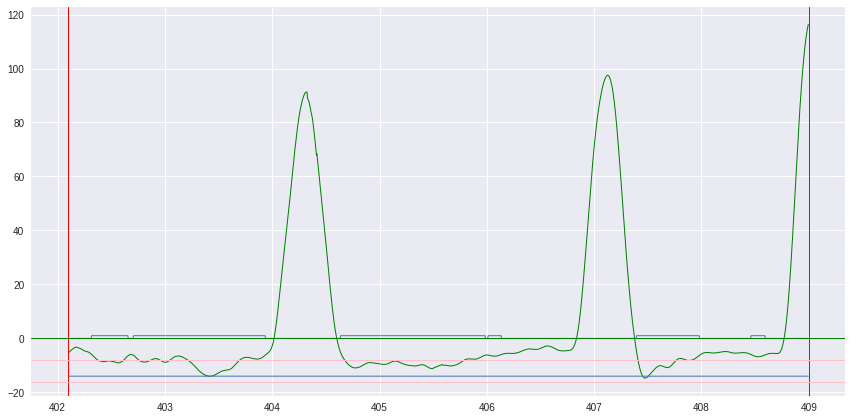

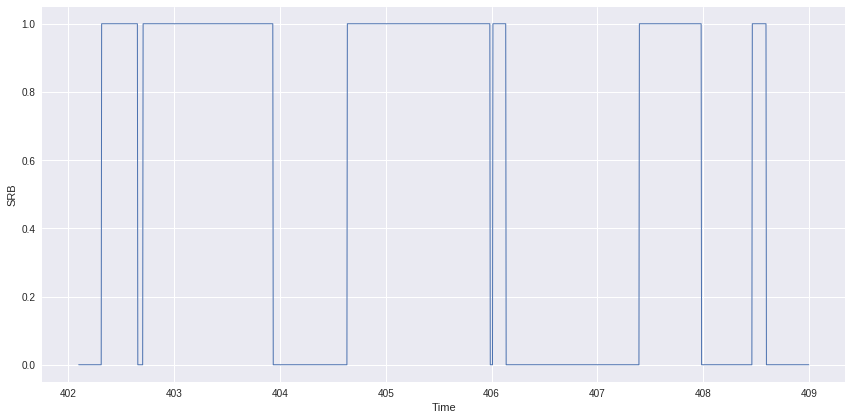

In [20]:
g = sns.FacetGrid(data=dfV, size=6, aspect=2)
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", 'SRB' , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');

g = sns.FacetGrid(data=dfV, size=6, aspect=2)
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1);

In [21]:
dfSRBtemp = dfV[dfV['SRB']==True]
dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)
dfSRBtemp.drop(['X_Pos', 'Y_Pos', 'Z_Pos', 'X_Ori', 'Y_Ori', 'Z_Ori','dT'], axis=1, inplace=True)
dfSRBtemp.drop(['lVo', 'lx1', 'lz1', 'V1', 'lx2', 'lz2', 'clockwise', 'theta', 'U', 'UM', 'MotiveExpTimeSecs', 'visible', 'speed', 'subU', 'subUM', 'SRB'], axis=1, inplace=True)

df2 = pd.merge(dfV, dfSRBtemp, on=['Frame', 'session_id','Time'], how='outer')
df2
print(len(dfV))
print(len(df2))
df2.fillna(0, inplace=True)
times = df2.dtime[df2['dtime']>0.005]
times

1650
1650


/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

110     0.012500
144     0.054167
605     0.704167
822     0.012500
933     0.029167
1265    1.262500
1521    0.483333
Name: dtime, dtype: float64

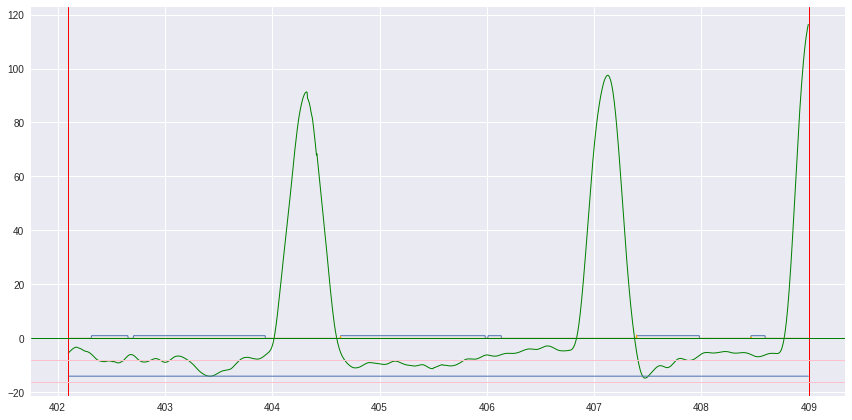

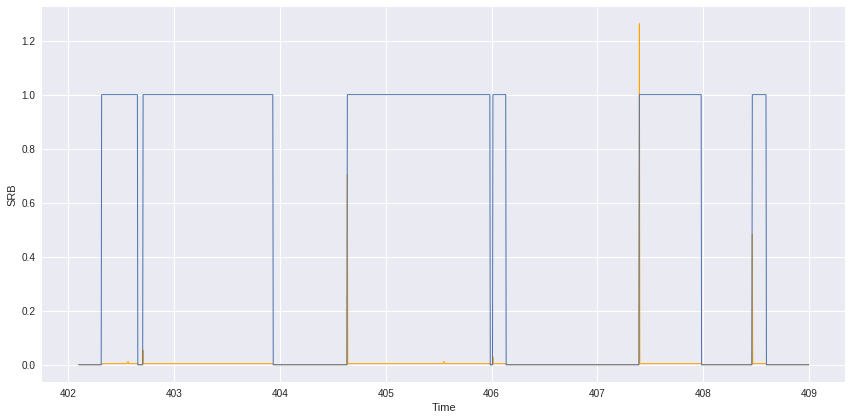

In [22]:
g = sns.FacetGrid(data=df2, size=6, aspect=2)
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", 'SRB' , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');

g = sns.FacetGrid(data=df2, size=6, aspect=2)
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1);

In [23]:
dftemp = dfSRBtemp[(dfSRBtemp['dtime']>0.005) & (dfSRBtemp['dtime']<0.1)]
dftemp = dftemp.reset_index(drop=True)

In [24]:
# dftemp = dftemp
print(dftemp)

maxF, minF = {}, {}
df2['SRBall'] =df2['SRB'] 

for i in np.arange(0,len(dftemp)):
# for i in np.arange(0,2):
    maxF[i] = dftemp.Time[i]
    minF[i] = df2[(df2['dtime']>0) & (df2['Time']<maxF[i])].Time
    minF[i] = minF[i].iloc[-1]
    print(i, minF[i], maxF[i])

    df2['SRBtt'] = np.where(((df2['Time']>minF[i]) & (df2['Time']<maxF[i])) , True, False)
    df2['SRBall'] = np.where((df2['SRBtt']==True) | (df2['SRBall']==True), True, False)


   Frame        Time  session_id     dtime
0  96616  402.566692           2  0.012500
1  96650  402.708359           2  0.054167
2  97332  405.550026           2  0.012500
3  97443  406.012526           2  0.029167
0 402.554192 402.566692
1 402.654192 402.708359
2 405.537526 405.550026
3 405.983359 406.012526


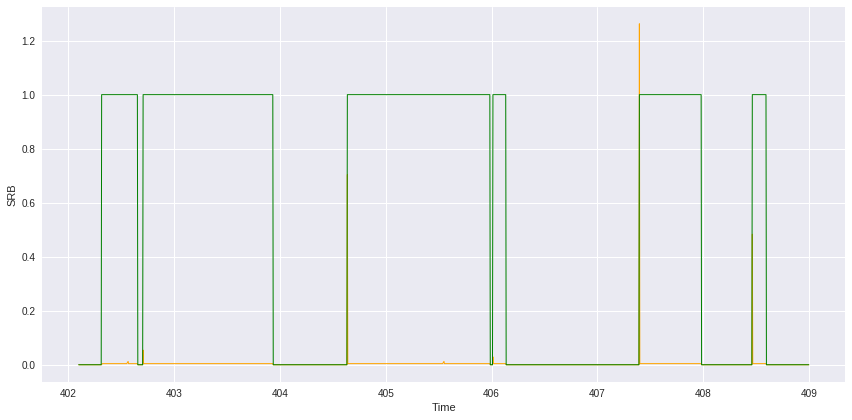

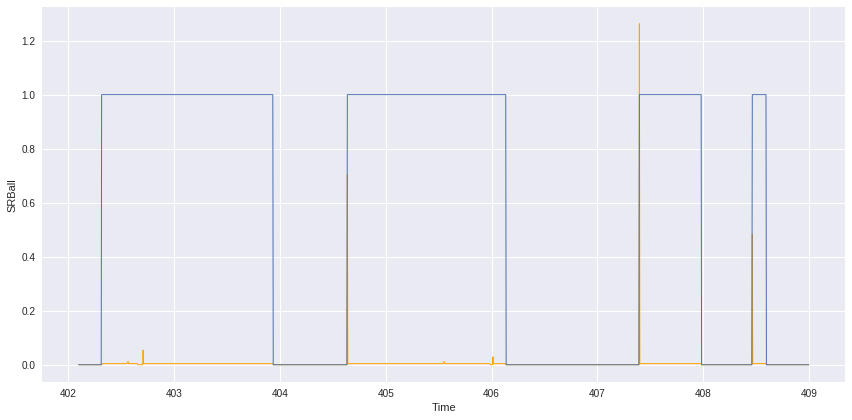

In [25]:
g = sns.FacetGrid(data=df2, size=6, aspect=2)
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=df2, size=6, aspect=2)
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1);

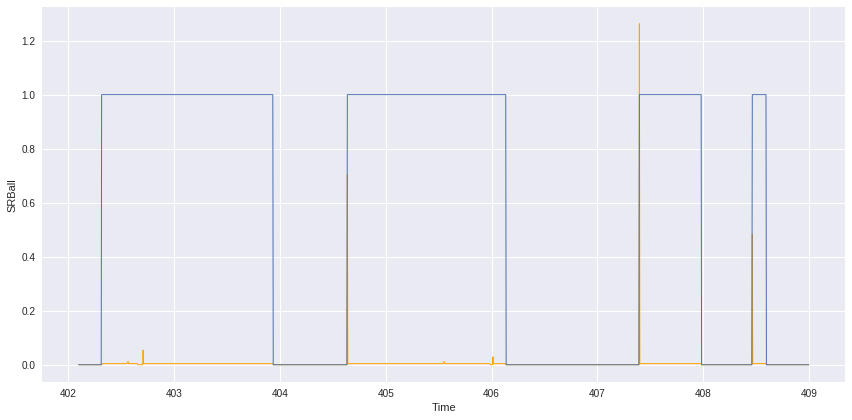

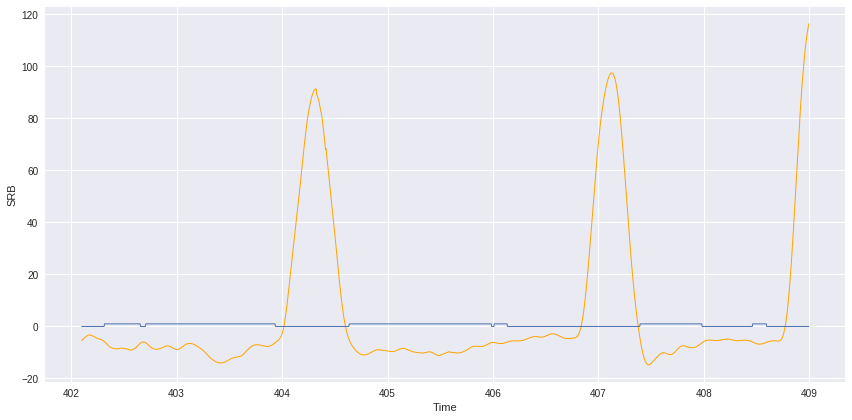

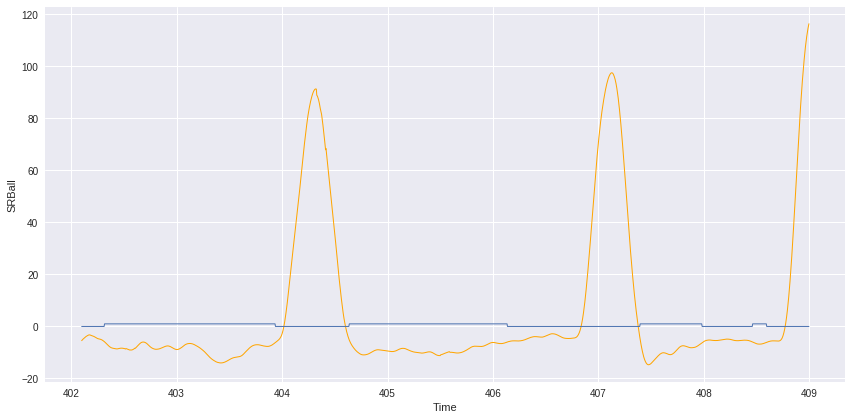

In [26]:
g = sns.FacetGrid(data=df2, size=6, aspect=2)
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1);

g = sns.FacetGrid(data=df2, size=6, aspect=2)
g.map(plt.plot, "Time", "UM" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1);

g = sns.FacetGrid(data=df2, size=6, aspect=2)
g.map(plt.plot, "Time", "UM" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1);
